<a href="https://colab.research.google.com/github/jjsalam/Colab-files/blob/main/Fruits_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# define the input shape
input_shape = (224,224,3)
fruit_classes = 4

In [ ]:
# build the CNN model
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, (3,3), activation='relu', padding='same',input_shape=input_shape),
    Conv2D(32, (5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolutional Layer
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Third Convolutional Layer
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (5,5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Fully connectedlayer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(fruit_classes, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
# loading training and validation dataset
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/fruit.cnn datasets',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/fruit.cnn datasets',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 26 images belonging to 4 classes.
Found 5 images belonging to 4 classes.


In [ ]:
# Train the model
history = model.fit(
    train_data,
    epochs=50,
    validation_data=test_data
)

Epoch 1/50


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 1024, but received input with shape (None, 173056)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# save the model
model.save('/content/drive/MyDrive/fruits_model.h5')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2000 - loss: 4.6060
Validation Accuracy: 20.00%


In [ ]:
# Predict the fruit
def predict_fruit(
    image_path,
    model_path='/content/drive/MyDrive/fruits_model.h5'):

    model=load_model(model_path)

    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0

    prediction = model.predict(image)
    class_index = np.argmax(prediction)

    class_labels = {
        0: 'Apple',
        1: 'Banana',
        2: 'Mango',
        3: 'Pomegranate'
    }

    predicted_class = class_labels[class_index]

    return predicted_class

In [ ]:
# Test the fruit
image_path = '/content/drive/MyDrive/pmgt.jpg'
predicted_fruit = predict_fruit(image_path)
print(f"Predicted fruit is : {predicted_fruit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Predicted fruit is : Pomegranate


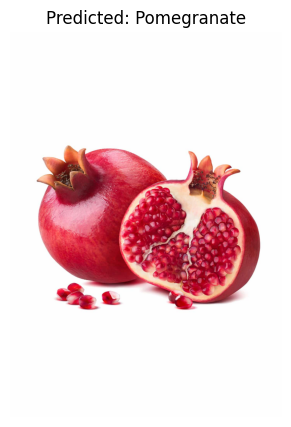

In [ ]:
import matplotlib.pyplot as plt

# Display the image and prediction
image = load_img(image_path)
plt.figure(figsize=(5,5))
plt.imshow(np.array(image))
plt.title(f"Predicted: {predicted_fruit}")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load and preprocess data (e.g., CIFAR-10)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3446 - loss: 1.7654 - val_accuracy: 0.5507 - val_loss: 1.2468
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.5679 - loss: 1.2107 - val_accuracy: 0.6081 - val_loss: 1.0994
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.6275 - loss: 1.0578 - val_accuracy: 0.6355 - val_loss: 1.0330
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6689 - loss: 0.9375 - val_accuracy: 0.6710 - val_loss: 0.9554
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7032 - loss: 0.8519 - val_accuracy: 0.6744 - val_loss: 0.9385
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7226 - loss: 0.7914 - val_accuracy: 0.6864 - val_loss: 0.9339
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.7428 - loss: 0.7308 - val_accuracy: 0.6964 - val_loss: 0.8968
Epoch 8/10
1563/1563 ━━